<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">


# Web Scraping for Indeed.com and Predicting Salaries

## <a class="anchor" id="Rank">Executive Summary</a>

The goal of this project is to predict High/Low salaries of Data Scientists in American cities

The metrics of the Recommender System is the accuracy of the systems models built:
I. Rank-based Recommender System
II. Content-based Recommender System
III. Collaborative-Fitering Recommender System with Surpise - SVD

The steps in this project are 
I. Data Scraping
II. Data Cleaning & Feature Engineering
III. Data Modelling
IV. Model Evaluation
      
_



### <a class="anchor" id="Rank">I. Data Scraping</a>

In [4]:
## This is the URL we used to collect data from Indeed

URL = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

In [5]:
import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook

In [6]:
## The first procedure web scrapping using Beautiful Soup

URL = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"
r = requests.get(URL)
sieve = BeautifulSoup(r.text)

In [120]:
# an example of how to scrape the first page of jobs

location = [] 
job = [] 
company = [] 
salary = []

for role in sieve.find_all('div', attrs={'class':'jobsearch-SerpJobCard'}):
    try:
        location.append(role.find('span', attrs={'class':'location'}).text.strip())
    except:
        location.append(np.nan)
        
    try:
        job.append(role.find('a', attrs={'data-tn-element':'jobTitle'}).text.strip())
    except:
        job.append(np.nan)
        
    try:
        company.append(role.find('span', attrs={'class':'company'}).text.strip())
    except:
        company.append(np.nan)
        
    try:
        salary.append(role.find('span', attrs={'class':'salary no-wrap'}).text.strip())
    except:
        salary.append(np.nan)
        
roles_page1 = pd.DataFrame({'Location': location,
                    'Job':job,
                    'Company':company,
                    'Salary':salary})
roles_page1

,Location,Job,Company,Salary
0,"New York, NY 10016 (Gramercy area)",Data Scientist,AETNA,"$98,000 - $144,000 a year (Indeed est.)"
1,"New York, NY 10010 (Gramercy area)","Data Scientist, CCM",Simons Foundation,"$107,000 - $158,000 a year (Indeed est.)"
2,"New York, NY",Data Scientist I,Grubhub,"$95,000 - $140,000 a year (Indeed est.)"
3,"Armonk, NY 10504",Data Scientist Intern/Coop,IBM,"$98,000 - $144,000 a year (Indeed est.)"
4,"New York, NY 10261 (Murray Hill area)",Data Scientist,Citi,"$115,000 - $170,000 a year (Indeed est.)"
5,"New York, NY",Data Scientist,Morgan Stanley,"$141,000 - $207,000 a year (Indeed est.)"
6,"New York, NY 10112 (Midtown area)",Master Data Scientist,Deloitte,"$77,000 - $114,000 a year (Indeed est.)"
7,"New York, NY",Data Scientist,Credibly,"$136,000 - $201,000 a year (Indeed est.)"
8,"New York, NY",Data Scientist - Alpha Insights,"Two Sigma Investments, LLC.","$104,000 - $153,000 a year (Indeed est.)"
9,"New York, NY 10018 (Clinton area)",Data Scientist - Uber Everything (NYC),Uber,"$105,000 - $155,000 a year (Indeed est.)"


In [121]:
# how to scrape the first 10 pages of job searches

location = [] 
job = [] 
company = [] 
salary = []

for x in tqdm_notebook(range(1, 10)):
    URL = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start={}".format(x)
    r = requests.get(URL)
    sieve = BeautifulSoup(r.text,'html.parser')
    for role in sieve.find_all('div', attrs={'class':'jobsearch-SerpJobCard'}):
        try:
            location.append(role.find('span', attrs={'class':'location'}).text)
        except:
            location.append(np.nan)
        
        try:
            job.append(role.find('a', attrs={'class':'turnstileLink'}).text)
        except:
            job.append(np.nan)
        
        try:
            company.append(role.find('span', attrs={'class':'company'}).text)
        except:
            company.append(np.nan)
        
        try:
            salary.append(role.find('span', attrs={'class':'salary no-wrap'}).text)
        except:
            salary.append(np.nan)
        
roles = pd.DataFrame({'Location': location,
                    'Job':job,
                    'Company':company,
                    'Salary':salary})
roles

,Location,Job,Company,Salary
0,"New York, NY",\n Junior Data Scientist,\n\n 1-800-Flowers.com,NaN
1,"New York, NY 10018 (Clinton area)",\nData Scientist - Uber Everything (NYC),\n\n Uber,NaN
2,"New York, NY 10022 (Midtown area)",\nData Engineer,\n\n Spruce,NaN
3,"New York, NY 10017 (Midtown area)",\n eCommerce Data Engineer Associate,\n\n PepsiCo,NaN
4,"New York, NY 10022 (Midtown area)",\n Research Intern - Microsoft Rese...,\n\n Microsoft,NaN
5,"New York, NY 10003 (Greenwich Village area)",\nData Engineer Intern,\n\n Integral Ad Science,NaN
6,"New York, NY",\nData Analyst,\n\n Getty Images,NaN
7,"New York, NY 10011 (Chelsea area)","\nData Scientist, Analytics & Insights",\n\n Spotify,NaN
8,"New York, NY",\nDATA SCIENCE -INTERN,"\n\n Foot Locker, Inc.",NaN
9,"New York, NY",\nData and Analysis Research Consultant,\n\n United Nations Development Program...,NaN


In [9]:
## a function to extract the location of jobs

def extract_location_from_result(result):
    location = []  
    for results in result.find_all('div', attrs={'class':'result'}):
        try:
            location.append(results.find('span',attrs = {'class':'location'}).text)
        except:
            try:
                location.append(results.find('div',attrs = {'class':'location'}).text)
            except:
                location.append(np.nan)
    
    return location

In [10]:
extract_location_from_result(sieve)

['New York, NY',
 'New York, NY 10018 (Clinton area)',
 'New York, NY',
 'New York, NY 11356',
 'New York, NY 10022 (Midtown area)',
 'New York, NY 10003 (Greenwich Village area)',
 'New York, NY 10011 (Chelsea area)',
 'New York, NY',
 'New York, NY',
 'New York, NY 10011 (Chelsea area)']

In [11]:
## a function to extract the job title of jobs

def extract_job_from_result(result):
    job = []
    for results in result.find_all('div', attrs={'class':'result'}):
        try:
            job.append(results.find('div',attrs = {'class':'title'}).text.strip())
        except:
            try:
                job.append(results.find('a', attrs={'class':'turnstileLink'}).text.strip())
            except:
                job.append(np.nan)
                    
    return job

In [12]:
extract_job_from_result(sieve)

['Junior Data Scientist',
 'Data Scientist - Uber Everything (NYC)',
 'Data Scientist',
 'Data Scientist, Product Development',
 'Research Intern - Microsoft Research FATE & Microsoft Office',
 'Data Engineer Intern',
 'Data Scientist, Analytics & Insights',
 'DATA SCIENCE -INTERN',
 'Data and Analysis Research Consultant',
 'Data Scientist, User Fraud']

In [13]:
## a function to extract the company of jobs

def extract_company_from_result(result):
    company = []
    for results in result.find_all('div', attrs={'class':'result'}):
        try:
            company.append(results.find('span',attrs = {'class':'company'}).text.strip())
        except:
            try:
                company.append(results.find('a',attrs = {'data-tn-elment':'companyName'}).text.strip())
            except:
                company.append(np.nan)
                
    return company

In [14]:
extract_company_from_result(sieve)

['1-800-Flowers.com',
 'Uber',
 'New York University',
 'Merkle Inc.',
 'Microsoft',
 'Integral Ad Science',
 'Spotify',
 'Foot Locker, Inc.',
 'United Nations Development Programme (UNDP)',
 'Spotify']

In [15]:
## a function to extract the salary of jobs

def extract_salary_from_result(result):
    salary = []
    for results in result.find_all('div', attrs={'class':'result'}):
        try:
            salary.append(results.find('span',attrs = {'class':'salary no-wrap'}).text.strip())
        except:
            try:
                salary.append(results.find('div', attrs = {'class': 'salarySnippet'}).text.strip())
            except:
                salary.append(np.nan)
                
    return salary

In [16]:
extract_salary_from_result(sieve)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

In [17]:
YOUR_CITY = 'Boston'

In [18]:
sieve.find('div',attrs={'id':'searchCount'})

<div id="searchCount">
        Page 2 of 2,487 jobs</div>

In [19]:
(sieve.find('div', attrs = {'id':"searchCount"}).text.strip().replace('Page 1 of ','').replace(' jobs','').replace(',',''))

'Page 2 of 2487'

In [21]:
# scraping all the Data Science jobs from indeed in US cities

url_template = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l={}&start={}"

location = []
job = []
company = []
salary = []

for city in tqdm_notebook(set(['New+York', 'Chicago', 'San+Francisco', 'Austin', 'Seattle', 
'Los+Angeles', 'Philadelphia', 'Atlanta', 'Dallas', 'Pittsburgh', 
'Portland', 'Phoenix', 'Denver', 'Houston', 'Miami', YOUR_CITY])):
    URL1 = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l={}&start=0".format(city)
    r = requests.get(URL1)
    soup = BeautifulSoup(r.text)
    max_results = int(soup.find('div',attrs={'id':'searchCount'}).text.strip().replace('Page 1 of ','').replace(' jobs','').replace(',',''))
    for start in tqdm_notebook(range(0, max_results, 10)):
        URL = url_template.format(city,start)
        r = requests.get(URL)
        soup = BeautifulSoup(r.text)
        
        location.extend(extract_location_from_result(soup))
        job.extend(extract_job_from_result(soup))
        company.extend(extract_company_from_result(soup))
        salary.extend(extract_salary_from_result(soup))
        
data = pd.DataFrame({"Location": location,
                     "Job Title": job,
                     "Company": company,
                     "Salary": salary})

### <a class="anchor" id="Rank">II. Data Cleaning & Feature Engineering</a>

In [29]:
data.head()

,Location,Job Title,Company,Salary
0,"Austin, TX",Data Scientist - AlienLabs,AT&T,NaN
1,"Austin, TX","R&D summer intern, NGS data analysis",PerkinElmer,NaN
2,"Austin, TX",Technology Intern - Machine Learning,iFly,NaN
3,"Austin, TX 78701 (Downtown area)",Data Research Analyst,Health & Human Services Comm,"$3,520 - $4,634 a month"
4,"Austin, TX",Technology Intern - Machine Learning,Skyventure Management LLC,NaN


In [48]:
data

,Location,Job Title,Company,Salary
0,"Austin, TX",Data Scientist - AlienLabs,AT&T,NaN
1,"Austin, TX","R&D summer intern, NGS data analysis",PerkinElmer,NaN
2,"Austin, TX",Technology Intern - Machine Learning,iFly,NaN
3,"Austin, TX 78701 (Downtown area)",Data Research Analyst,Health & Human Services Comm,"$3,520 - $4,634 a month"
4,"Austin, TX",Technology Intern - Machine Learning,Skyventure Management LLC,NaN
5,"Austin, TX 78769 (Windsor Road area)",Entry Level Scientist,AECOM,NaN
6,"Austin, TX 78723 (Windsor Park area)",CoMET Technician Field/Laboratory (Entry Level),Kleinfelder,NaN
7,"Austin, TX 78746",Associate Data Scientist,SolarWinds,NaN
8,"Austin, TX 78732",Graduate Intern - Water Conservation,Lower Colorado River Authority,NaN
9,"Austin, TX 78727",Data Science Specialist,Accenture,NaN


In [220]:
data = data[data['Salary'].isnull() != True]
data.head()

,Location,Job Title,Company,Salary
3,"Austin, TX 78701 (Downtown area)",Data Research Analyst,Health & Human Services Comm,"$3,520 - $4,634 a month"
10,"Austin, TX",Data Scientist,Cerebri AI,"$86,000 - $127,000 a year (Indeed est.)"
12,"Austin, TX 78750",Data Scientist for Digital Lab,Siemens,"$102,000 - $151,000 a year (Indeed est.)"
13,"Austin, TX 78746",Associate Data Scientist,SolarWinds,"$98,000 - $145,000 a year (Indeed est.)"
17,"Austin, TX 73344",Python Learning Framework and Data Science Eco...,IBM,"$112,000 - $165,000 a year (Indeed est.)"


In [221]:
df_year = data[(data.Salary.str.contains('year'))]
df_year.head()

,Location,Job Title,Company,Salary
10,"Austin, TX",Data Scientist,Cerebri AI,"$86,000 - $127,000 a year (Indeed est.)"
12,"Austin, TX 78750",Data Scientist for Digital Lab,Siemens,"$102,000 - $151,000 a year (Indeed est.)"
13,"Austin, TX 78746",Associate Data Scientist,SolarWinds,"$98,000 - $145,000 a year (Indeed est.)"
17,"Austin, TX 73344",Python Learning Framework and Data Science Eco...,IBM,"$112,000 - $165,000 a year (Indeed est.)"
36,"Austin, TX",Oracle Consulting Services / Autonomous Data S...,Oracle,"$107,000 - $158,000 a year (Indeed est.)"


In [222]:
df_year['Salary'].head()

10     $86,000 - $127,000 a year (Indeed est.)
12    $102,000 - $151,000 a year (Indeed est.)
13     $98,000 - $145,000 a year (Indeed est.)
17    $112,000 - $165,000 a year (Indeed est.)
36    $107,000 - $158,000 a year (Indeed est.)
Name: Salary, dtype: object

In [223]:
## Using regex to clean the data

import re
df_year['Salary'] = [re.findall('\d+....', x) for x in df_year['Salary']]
df_year['Salary'].head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


10     [86,000, 127,000]
12    [102,000, 151,000]
13     [98,000, 145,000]
17    [112,000, 165,000]
36    [107,000, 158,000]
Name: Salary, dtype: object

In [224]:
df_year['Salary'] = [[(int(element.replace(',','')))for element in lists] for lists in df_year['Salary']]
df_year['Salary'] = [np.array(lists).mean() for lists in drugo]
df_year['Salary'].head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


10    106500.0
12    126500.0
13    121500.0
17    138500.0
36    132500.0
Name: Salary, dtype: float64

In [225]:
df_year = df_year.drop_duplicates(subset=None, keep='first', inplace=False)
df_year.head()

,Location,Job Title,Company,Salary
10,"Austin, TX",Data Scientist,Cerebri AI,106500.0
12,"Austin, TX 78750",Data Scientist for Digital Lab,Siemens,126500.0
13,"Austin, TX 78746",Associate Data Scientist,SolarWinds,121500.0
17,"Austin, TX 73344",Python Learning Framework and Data Science Eco...,IBM,138500.0
36,"Austin, TX",Oracle Consulting Services / Autonomous Data S...,Oracle,132500.0


In [226]:
df_year.to_csv('jobs.csv', index=True)

In [416]:
jobs = pd.read_csv('jobs.csv')
del jobs['Unnamed: 0']
jobs.head()

,Location,Job Title,Company,Salary
0,"Austin, TX",Data Scientist,Cerebri AI,106500.0
1,"Austin, TX 78750",Data Scientist for Digital Lab,Siemens,126500.0
2,"Austin, TX 78746",Associate Data Scientist,SolarWinds,121500.0
3,"Austin, TX 73344",Python Learning Framework and Data Science Eco...,IBM,138500.0
4,"Austin, TX",Oracle Consulting Services / Autonomous Data S...,Oracle,132500.0


In [417]:
print(jobs['Company'].nunique())
print(jobs['Job Title'].nunique())
print(jobs['Location'].nunique())

378
468
225


In [418]:
jobs.dtypes

Location      object
Job Title     object
Company       object
Salary       float64
dtype: object

In [419]:
jobs.describe()

,Salary
count,570.000000
mean,108993.491228
std,32215.884146
min,30000.000000
25%,88243.875000
50%,113500.000000
75%,132500.000000
max,275000.000000


#### Next, we want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median).


In [420]:
jobs['Salary'].median() 

113500.0

In [421]:
jobs['High Salary']=(jobs.Salary>113500.000000)*1
jobs.head()

,Location,Job Title,Company,Salary,High Salary
0,"Austin, TX",Data Scientist,Cerebri AI,106500.0,0
1,"Austin, TX 78750",Data Scientist for Digital Lab,Siemens,126500.0,1
2,"Austin, TX 78746",Associate Data Scientist,SolarWinds,121500.0,1
3,"Austin, TX 73344",Python Learning Framework and Data Science Eco...,IBM,138500.0,1
4,"Austin, TX",Oracle Consulting Services / Autonomous Data S...,Oracle,132500.0,1


In [422]:
jobs['High Salary'].value_counts(normalize=True)

0    0.505263
1    0.494737
Name: High Salary, dtype: float64

### Create a classification model to predict High/Low salary. 


#### Model based on location:

- Start by ONLY using the location as a feature. 
- Use logistic regression with both statsmodels and sklearn.
- Use a further classifier you find suitable.
- Remember that scaling your features might be necessary.
- Display the coefficients/feature importances and write a short summary of what they mean.

#### Model taking into account job levels and categories:

- Create a few new variables in your dataframe to represent interesting features of a job title.
- For example, create a feature that represents whether 'Senior' is in the title or whether 'Manager' is in the title. 
- Incorporate other text features from the title or summary that you believe will predict the salary.
- Then build new classification models including also those features. Do they add any value? 
- Tune your models by testing parameter ranges, regularization strengths, etc. Discuss how that affects your models. 
- Discuss model coefficients or feature importances as applicable.

#### Model evaluation:

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs. 


- Use cross-validation to evaluate your models. 
- Evaluate the accuracy, AUC, precision and recall of the models. 
- Plot the ROC and precision-recall curves for at least one of your models.

### <a class="anchor" id="Rank">III. Data Modelling</a>

#### A. Model with only Location Feauture

In [423]:
jobs.iloc[:29,0] = 'Austin'
jobs.iloc[29:76,0] = 'Los Angeles'
jobs.iloc[76:96,0] = 'Phoenix'
jobs.iloc[96:209,0] = 'New York'
jobs.iloc[209:226,0] = 'Portland'
jobs.iloc[226:243,0] = 'Dallas'
jobs.iloc[243:284,0] = 'Denver'
jobs.iloc[284:327,0] = 'Seattle'
jobs.iloc[327:355,0] = 'Atlanta'
jobs.iloc[355:365,0] = 'Miami'
jobs.iloc[365:431,0] = 'Boston'
jobs.iloc[431:458,0] = 'Chicago'
jobs.iloc[458:473,0] = 'Huston'
jobs.iloc[473:499,0] = 'Philadelphia'
jobs.iloc[499:514,0] = 'Pittsburgh'
jobs.iloc[514:,0] = 'San Francisco'
jobs.tail()

,Location,Job Title,Company,Salary,High Salary
565,San Francisco,Senior Data Software Engineer - Personalizatio...,Castlight Health,138000.0,1
566,San Francisco,Sr Software Engineer I,Electronic Arts,156500.0,1
567,San Francisco,Fullstack Software Engineer - Talent Products,Uber,154500.0,1
568,San Francisco,"Software Engineer, ARCore",Google,130000.0,1
569,San Francisco,"Senior Software Engineer, Data Analytics",Autodesk,130000.0,1


In [425]:
X = pd.get_dummies(jobs, columns=['Location'])
X = X.drop(axis = 1, columns=['Job Title', 'Company', 'Salary'])
y = X.pop('High Salary')

In [428]:
y.value_counts(normalize=True)

0    0.505263
1    0.494737
Name: High Salary, dtype: float64

In [430]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [431]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                        test_size=0.3, stratify=y, random_state=1)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns, index=y_train.index)
X_test = pd.DataFrame(X_test,  columns=X.columns, index=y_test.index)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  import sys


In [476]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [531]:
model = LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=1000)

model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(cross_val_score(model, X_train, y_train, cv=5).mean())
print(model.score(X_test, y_test))


0.6190476190476191
0.5764025629004532
0.543859649122807


In [480]:
model_params = {'penalty':['l2'],
             'C':np.logspace(-2,2,5)
            }
gs = GridSearchCV(model, model_params, cv=5)   



In [ ]:
import scikitplot as skplt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl", len(gs.classes_)))

In [481]:
from sklearn.tree import DecisionTreeClassifier

In [482]:
dtc = DecisionTreeClassifier(max_depth=3)

dtc.fit(X, y)
dtc_scores = cross_val_score(dtc, X, y, cv=5)

print(dtc_scores, np.mean(dtc_scores))


[0.50434783 0.50434783 0.44736842 0.50442478 0.50442478] 0.4929827261497337


In [483]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [448]:
def plot_dt(dt, feature_names=None):
    print('Max depth:', dt.max_depth)
    dot_data = StringIO()
    export_graphviz(dt,
                    out_file=dot_data,
                    filled=True,
                    rounded=True,
                    special_characters=True,
                    feature_names=feature_names
                    )

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

Max depth: 3


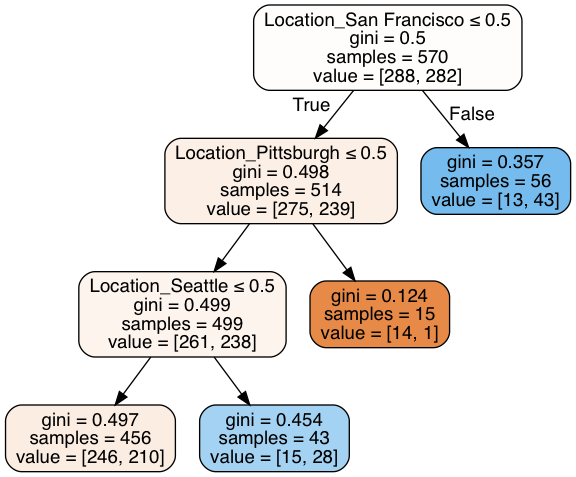

In [450]:
plot_dt(dtc, feature_names=X.columns)

In [451]:
dtc_params = {
    'max_depth': list(range(1, 11))+[None],
    'max_features': [None, 1, 2, 3],
    'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50]
}

model = DecisionTreeClassifier()
dtc_gs = GridSearchCV(model, dtc_params, cv=5, verbose=1, iid=False)

In [452]:
dtc_gs.fit(X, y)
dtc_best = dtc_gs.best_estimator_
print(dtc_gs.best_params_)
print(dtc_gs.best_score_)

Fitting 5 folds for each of 484 candidates, totalling 2420 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'max_depth': 1, 'max_features': None, 'min_samples_split': 2}
0.5052634279041197


[Parallel(n_jobs=1)]: Done 2420 out of 2420 | elapsed:   13.3s finished


In [455]:
dtc = DecisionTreeClassifier(max_depth=1)

dtc.fit(X, y)
dtc_scores = cross_val_score(dtc, X, y, cv=5)

print(dtc_scores, np.mean(dtc_scores))



[0.50434783 0.50434783 0.50877193 0.50442478 0.50442478] 0.5052634279041197


In [462]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

In [463]:
DT = DecisionTreeClassifier()
BC = BaggingClassifier(base_estimator=DT,
                       n_estimators=50,
                       max_features=0.5,
                       max_samples=0.5,
                       oob_score=True)

# Fitting the Bag
BC.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=50, n_jobs=None, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [464]:
print(BC.score(X_train, y_train))
print(BC.score(X_test, y_test))
print(BC.oob_score_)
print(accuracy_score(y_test, BC.predict(X_test)))

0.6190476190476191
0.543859649122807
0.5413533834586466
0.543859649122807


#### B. Model with all Features
Job Title Inclusive

In [515]:
def buzzword_senior_postion_engineer(x):

    if ['senior'] == re.findall('senior',x):
      return 'Senior_pos'
  elif ['sr.'] == re.findall('sr', x):
      return 'Senior_pos'
  elif ['manager'] == re.findall('manager',x):
      return 'Senior_pos'
  elif ['sr'] == re.findall('sr',x):
      return 'Senior_pos'
  elif ['chief'] == re.findall('chief',x):
      return 'Senior_pos'
  elif ['director']== re.findall('director',x):
      return 'Senior_pos'
  elif ['engineer'] == re.findall('engineer',x):
      return 'Engineer'
  elif ['data scientist'] == re.findall('data scientist',x):
      return 'Data scientist'
  else:
      return x

In [513]:
jobs['Job Title']=jobs['Job Title'].apply(lambda x : x.lower())

In [514]:
jobs['Job Title']=jobs['Job Title'].apply(buzzword_senior_postion_engineer)

In [522]:
jobs['Senior_pos']=(jobs['Job Title']=='Senior_pos')*1

jobs['Engineer']=(jobs['Job Title']=='Engineer')*1

jobs['Data Scientist']=(jobs['Job Title']=='Data Scientist')*1



In [523]:
jobs.head()

,Location,Job Title,Company,Salary,High Salary,Senior_pos,Engineer,Data Scientist
0,Austin,data scientist,Cerebri AI,106500.0,0,0,0,0
1,Austin,data scientist,Siemens,126500.0,1,0,0,0
2,Austin,data scientist,SolarWinds,121500.0,1,0,0,0
3,Austin,python learning framework and data science eco...,IBM,138500.0,1,0,0,0
4,Austin,data scientist,Oracle,132500.0,1,0,0,0


In [524]:
X2 = pd.get_dummies(jobs, columns=['Location'])
X2 = X2.drop(axis = 1, columns=['Job Title', 'Company', 'Salary'])
y2 = X2.pop('High Salary')

In [532]:
X2.head()

,Senior_pos,Engineer,Data Scientist,Location_Atlanta,Location_Austin,Location_Boston,Location_Chicago,Location_Dallas,Location_Denver,Location_Huston,Location_Los Angeles,Location_Miami,Location_New York,Location_Philadelphia,Location_Phoenix,Location_Pittsburgh,Location_Portland,Location_San Francisco,Location_Seattle
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [533]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, 
                        test_size=0.3, stratify=y, random_state=1)

scaler = StandardScaler()

X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

X2_train = pd.DataFrame(X2_train, columns=X2.columns, index=y_train.index)
X2_test = pd.DataFrame(X2_test,  columns=X2.columns, index=y_test.index)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  import sys


In [535]:
model = LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=1000)

model.fit(X2_train, y2_train)
print(model.score(X2_train, y2_train))
print(cross_val_score(model, X2_train, y2_train, cv=5).mean())
print(model.score(X2_test, y2_test))

0.6265664160401002
0.5889982809814034
0.5555555555555556


In [528]:
model_params = {'penalty':['l1','l2'],
             'C':np.logspace(-5,5,10),
                
            }
gs = GridSearchCV(model, model_params, cv=5)   

In [536]:
model = LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=1000)

model.fit(X2_train, y2_train)
print(model.score(X2_train, y2_train))
print(cross_val_score(model, X2_train, y2_train, cv=5).mean())
print(model.score(X2_test, y2_test))


0.6265664160401002
0.5889982809814034
0.5555555555555556


In [546]:
dtc = DecisionTreeClassifier(max_depth=2)

dtc.fit(X2, y2)
dtc_scores = cross_val_score(dtc, X2, y2, cv=5)

print(dtc_scores, np.mean(dtc_scores))


[0.50434783 0.44347826 0.50877193 0.50442478 0.59292035] 0.5107886299048893


Max depth: 2


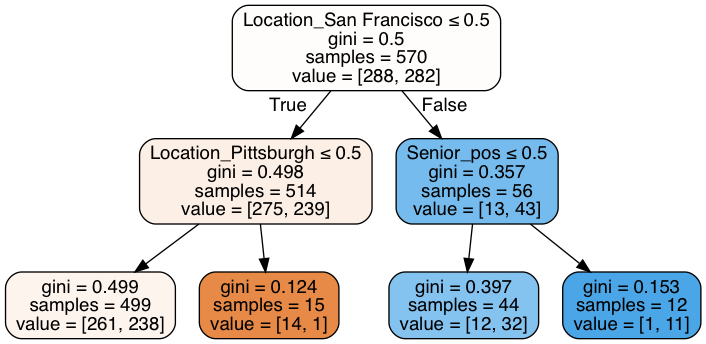

In [547]:
plot_dt(dtc, feature_names=X2.columns)

In [548]:
DT = DecisionTreeClassifier()
BC = BaggingClassifier(base_estimator=DT,
                       n_estimators=50,
                       max_features=0.5,
                       max_samples=0.5,
                       oob_score=True)

# Fitting the Bag
BC.fit(X2_train, y2_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=50, n_jobs=None, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [549]:
print(BC.score(X2_train, y2_train))
print(BC.score(X2_test, y2_test))
print(BC.oob_score_)
print(accuracy_score(y2_test, BC.predict(X2_test)))

0.6491228070175439
0.6140350877192983
0.5488721804511278
0.6140350877192983


### <a class="anchor" id="Rank">IV. Data Evaluation</a>

In [557]:
def fitter(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    print(model.score(X_train, y_train))
    #print(cross_val_score(model, X_train, y_train, cv=5).mean())
    print(model.score(X_test, y_test))
    print()
    print(confusion_matrix(y_train, model.predict(X_train), labels =[1,0]))
    print()
    print(classification_report(y_train, model.predict(X_train)))
    print()
    print(confusion_matrix(y_test, model.predict(X_test), labels = [1,0]))
    print()
    print(classification_report(y_test, model.predict(X_test)))

In [560]:
result = fitter(BC, X2_train, y2_train, X2_test, y2_test)

0.656641604010025
0.6023391812865497

[[121  76]
 [ 61 141]]

              precision    recall  f1-score   support

           0       0.65      0.70      0.67       202
           1       0.66      0.61      0.64       197

   micro avg       0.66      0.66      0.66       399
   macro avg       0.66      0.66      0.66       399
weighted avg       0.66      0.66      0.66       399


[[47 38]
 [30 56]]

              precision    recall  f1-score   support

           0       0.60      0.65      0.62        86
           1       0.61      0.55      0.58        85

   micro avg       0.60      0.60      0.60       171
   macro avg       0.60      0.60      0.60       171
weighted avg       0.60      0.60      0.60       171



In [563]:
print('Baseline:\t', np.mean(y2_test))
print('Model score:\t', BC.score(X2_test, y2_test), end=' ')

Baseline:	 0.49707602339181284
Model score:	 0.6023391812865497 

In [564]:
# predicted test class:
y_pred = BC.predict(X2_test)

# predicted test probability:
y_pp = BC.predict_proba(X2_test)

In [567]:
np.unique(y2_test, return_counts=True)

(array([0, 1]), array([86, 85]))

In [572]:
conmat = np.array(confusion_matrix(y2_test, y_pred, labels=[0, 1]))

confusion = pd.DataFrame(conmat, index=['high_salary', 'low_salary'],
                         columns=['predicted_high', 'predicted_low'])
confusion

,predicted_high,predicted_low
high_salary,56,30
low_salary,38,47


In [569]:
Y_pp = pd.DataFrame(BC.predict_proba(X2_test), columns=[
                    'class_0_pp', 'class_1_pp'])
Y_pp.head(10)

,class_0_pp,class_1_pp
0,0.532526,0.467474
1,0.284586,0.715414
2,0.459157,0.540843
3,0.532526,0.467474
4,0.408655,0.591345
5,0.415177,0.584823
6,0.599380,0.400620
7,0.580645,0.419355
8,0.424848,0.575152
9,0.533208,0.466792


In [622]:
Y_pp['pred_class_thresh'] = [
    1 if x >= 0.29 else 0 for x in Y_pp.class_1_pp.values]
Y_pp.head(20)

,class_0_pp,class_1_pp,pred_class_thresh
0,0.532526,0.467474,1
1,0.284586,0.715414,1
2,0.459157,0.540843,1
3,0.532526,0.467474,1
4,0.408655,0.591345,1
5,0.415177,0.584823,1
6,0.599380,0.400620,1
7,0.580645,0.419355,1
8,0.424848,0.575152,1
9,0.533208,0.466792,1


In [623]:
conmat = np.array(confusion_matrix(
    y2_test, Y_pp.pred_class_thresh, labels=[0, 1]))

confusion = pd.DataFrame(conmat, index=['high_salary', 'low_salary'],
                         columns=['predicted_high', 'predicted_low'])
confusion
confusion

,predicted_high,predicted_low
high_salary,4,82
low_salary,0,85


In [624]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt



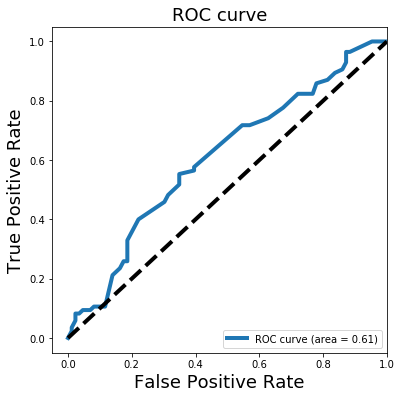

In [625]:
fpr, tpr, threshold = roc_curve(y2_test, Y_pp.class_1_pp)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for class 1
plt.figure(figsize=[6, 6])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC curve', fontsize=18)
plt.legend(loc="lower right")
plt.show()



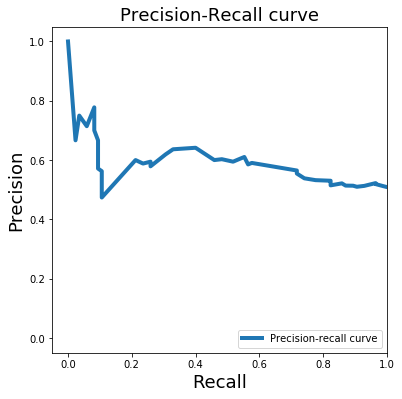

In [626]:
precision, recall, threshold = precision_recall_curve(y_test, Y_pp.class_1_pp)

plt.figure(figsize=[6, 6])
plt.plot(recall, precision, label='Precision-recall curve', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision-Recall curve', fontsize=18)
plt.legend(loc="lower right")
plt.show()

Our original confusion matrix had too many peoples salaries predicted high, although they unfortunately wouldnt have gotten high salaries, we altered our thresehold to fix this problem as seen above, prior to the requirement.

Changing the threshold makes my model less accurate.

#### Therefore, there will be a trade off bewteen limting false postiives and my model precision.